In [143]:
import sys 
import numpy
import matplotlib
import pandas
import sklearn


print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2


In [191]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import boxplot
from matplotlib.pyplot import bar
import matplotlib.pyplot as plt
import pandas as pd

In [145]:
# loading the dataset

df = pd.read_csv('data 2.csv')

In [146]:
# preprocessing the data
df.replace(['?'], -99999, inplace = True)
print(df.axes)

df.drop(['id','Unnamed: 32'], 1, inplace = True)


#print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=569, step=1), Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')]
(569, 31)


In [147]:
# dataset visualization
print(df.loc[6])
print(df.describe())

diagnosis                         M
radius_mean                   18.25
texture_mean                  19.98
perimeter_mean                119.6
area_mean                      1040
smoothness_mean             0.09463
compactness_mean              0.109
concavity_mean               0.1127
concave points_mean           0.074
symmetry_mean                0.1794
fractal_dimension_mean      0.05742
radius_se                    0.4467
texture_se                   0.7732
perimeter_se                   3.18
area_se                       53.91
smoothness_se              0.004314
compactness_se              0.01382
concavity_se                0.02254
concave points_se           0.01039
symmetry_se                 0.01369
fractal_dimension_se       0.002179
radius_worst                  22.88
texture_worst                 27.66
perimeter_worst               153.2
area_worst                     1606
smoothness_worst             0.1442
compactness_worst            0.2576
concavity_worst             

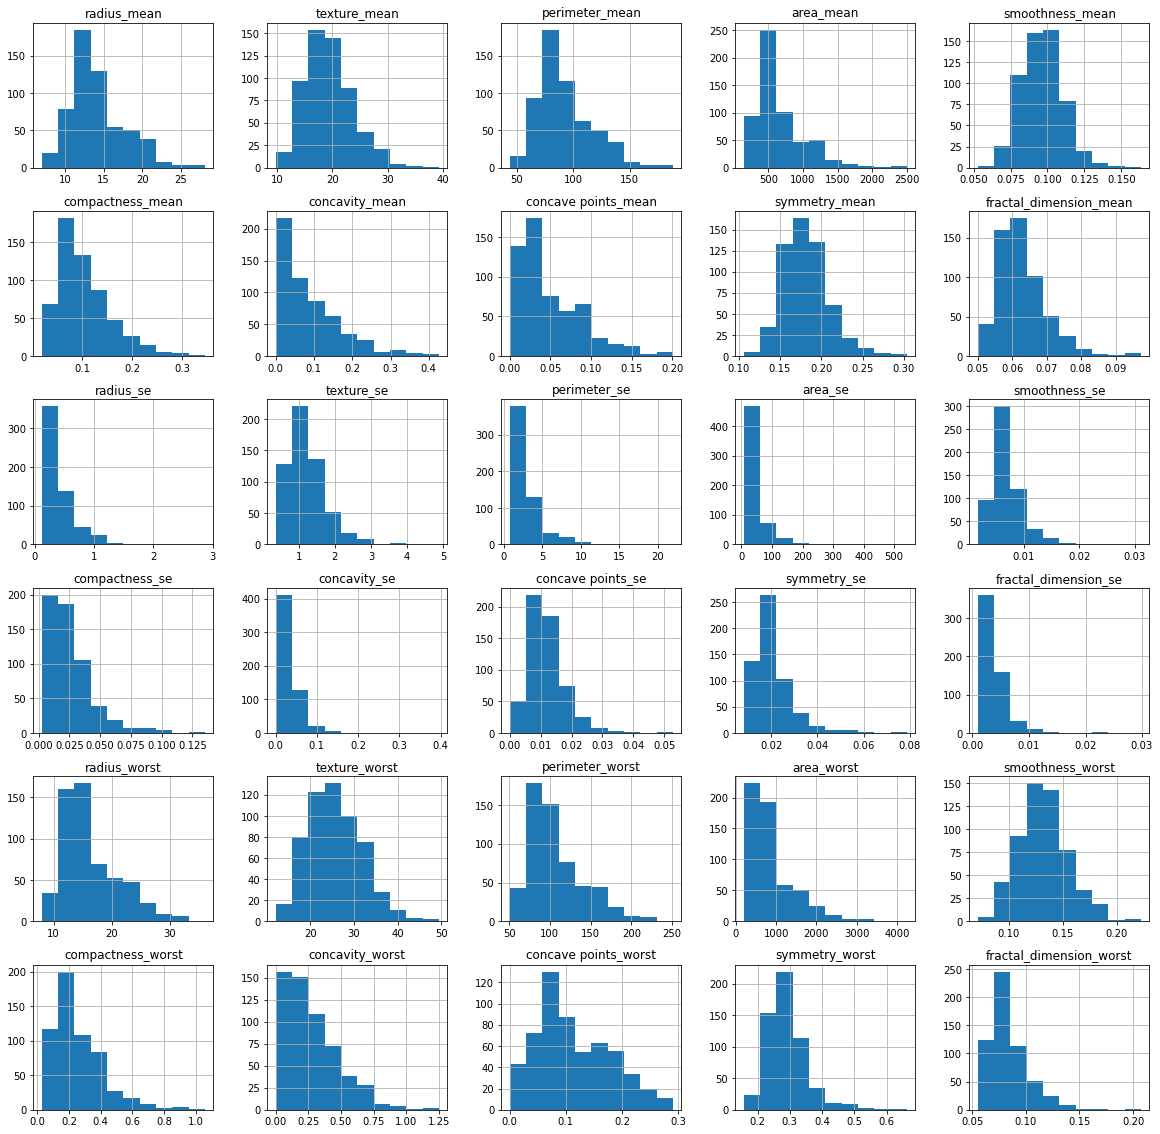

In [148]:
# ploting histograms for each variable
df.hist(figsize = (20, 20))
plt.show()

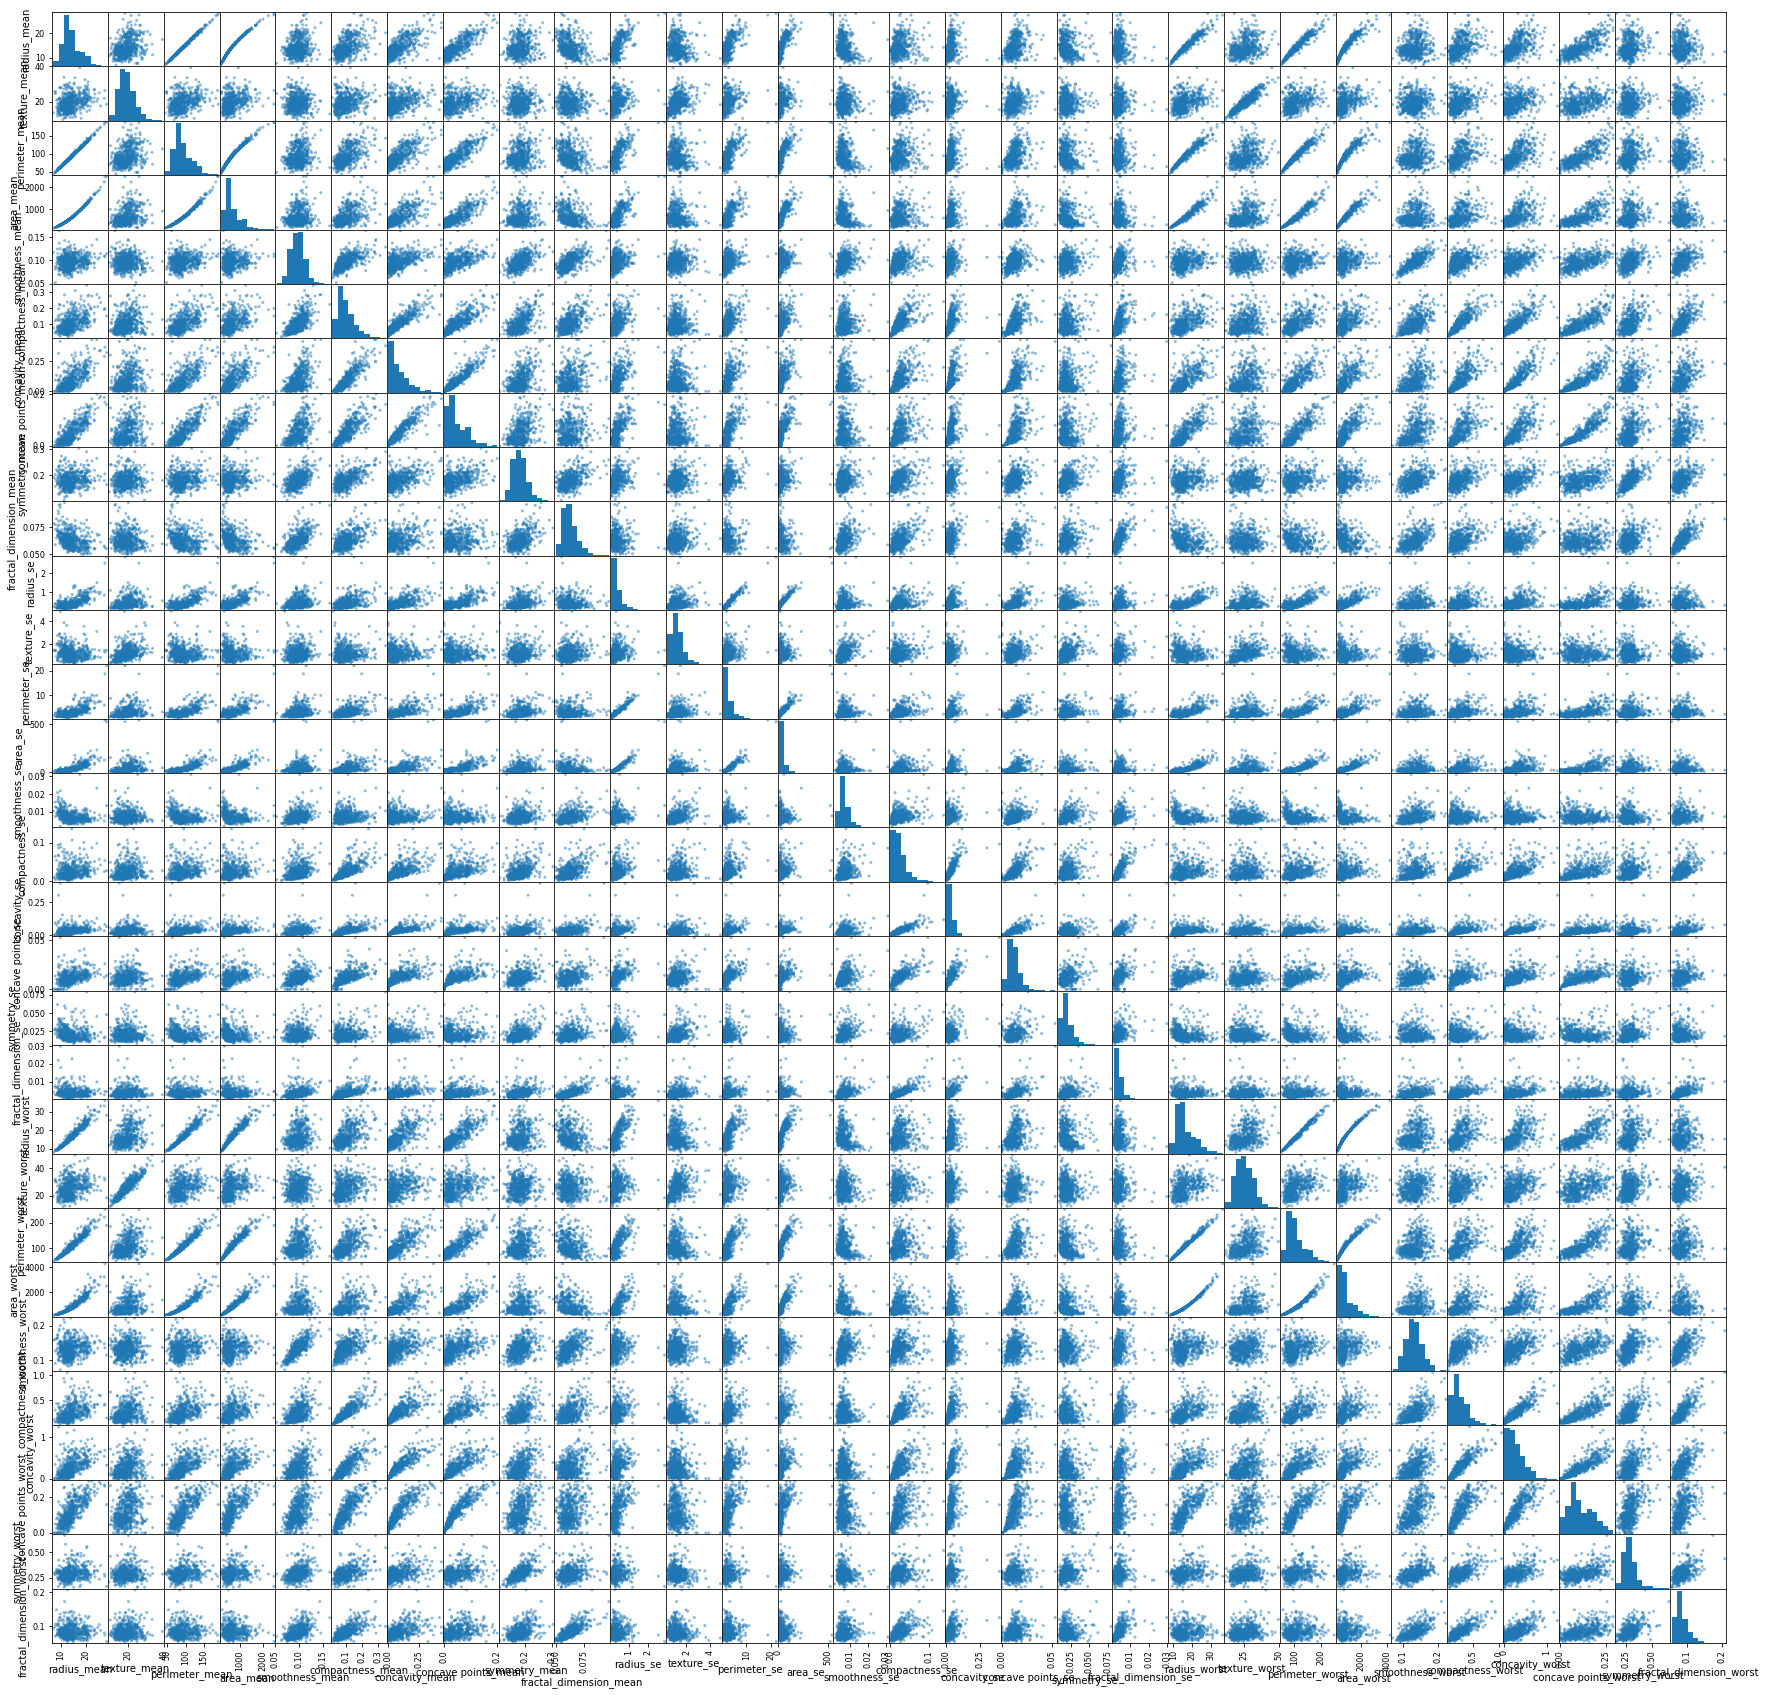

In [149]:
# creating scatter plot matrix
scatter_matrix(df, figsize = (30, 30))
plt.show()

In [161]:
# creating X and Y datasets for training

X = np.array(df.drop(['diagnosis'],1))
y = np.array(df['diagnosis'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [162]:
# specify testing options
seed = 8
scoring = 'accuracy'

In [181]:
# Defining the model to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('LSVM', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))


#Evaluating model in models:
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results =model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: 0.936184 (0.028923)
SVM: 0.921014 (0.045173)


C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

LR: 0.938454 (0.019120)


C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to con

LSVM: 0.898841 (0.063385)
RFC: 0.958357 (0.028328)
DT: 0.934348 (0.037603)


C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GB: 0.962754 (0.031091)


C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GNB: 0.938502 (0.019109)


In [182]:
#  Make the predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test, predictions))

KNN
0.9210526315789473
              precision    recall  f1-score   support

           B       0.93      0.94      0.94        71
           M       0.90      0.88      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

SVM
0.9035087719298246
              precision    recall  f1-score   support

           B       0.88      0.97      0.93        71
           M       0.94      0.79      0.86        43

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114

LR
0.9385964912280702
              precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weight

C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


RFC
0.956140350877193
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

DT
0.9298245614035088
              precision    recall  f1-score   support

           B       0.93      0.96      0.94        71
           M       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

GB
0.9736842105263158
              precision    recall  f1-score   support

           B       0.99      0.97      0.98        71
           M       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted

In [199]:
#SVC
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,1,5,4,7,2,4,0,2,3,3,0,3,2,1,5,4,6,7,2,5,2,3]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

#KNeighborClassifier
clf = KNeighborsClassifier(n_neighbors = 5)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,1,5,4,7,2,4,0,2,3,3,0,3,2,1,5,4,6,7,2,5,2,3]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

#LogisticRegression
clf = LogisticRegression()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,1,5,4,7,2,4,0,2,3,3,0,3,2,1,5,4,6,7,2,5,2,3]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

#LinearSVC
clf = LinearSVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,1,5,4,7,2,4,0,2,3,3,0,3,2,1,5,4,6,7,2,5,2,3]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

#RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,1,5,4,7,2,4,0,2,3,3,0,3,2,1,5,4,6,7,2,5,2,3]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

#DecisionTree
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,1,5,4,7,2,4,0,2,3,3,0,3,2,1,5,4,6,7,2,5,2,3]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

#GradientBoostingClassifier
clf = GradientBoostingClassifier()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,1,5,4,7,2,4,0,2,3,3,0,3,2,1,5,4,6,7,2,5,2,3]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

#GaussianNB
clf = GaussianNB()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,1,5,4,7,2,4,0,2,3,3,0,3,2,1,5,4,6,7,2,5,2,3]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.9035087719298246
['B']
0.9210526315789473
['B']
0.9385964912280702
['M']
0.9210526315789473
['M']


C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anurag Dhiman\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.956140350877193
['M']
0.9473684210526315
['M']
0.9736842105263158
['M']
0.956140350877193
['M']
